In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("cc_institution_details.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,unitid,chronname,city,state,level,control,basic,student_count,ft_pct,fte_value,...,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,4051,93.8,3906,...,15.0,29.1,14.0,71.2,98.0,63.1,17.0,82.8,89.0,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,11502,72.7,10032,...,67.0,53.5,66.0,35.1,39.0,80.2,70.0,92.4,98.0,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,322,62.7,294,...,0.0,66.7,72.0,68.4,91.0,37.5,2.0,67.2,71.0,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,5696,74.4,5000,...,34.0,48.4,54.0,32.8,32.0,81.0,72.0,65.5,56.0,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,5356,91.0,5035,...,11.0,25.2,9.0,82.7,100.0,62.2,15.0,67.0,58.0,1351.0


In [5]:
df.isnull().sum()


unitid                    0
chronname                 0
city                      0
state                     0
level                     0
control                   0
basic                     0
student_count             0
ft_pct                    4
fte_value                 0
fte_percentile            0
med_sat_value          2461
med_sat_percentile     2461
aid_value                 1
aid_percentile            1
endow_value            1475
endow_percentile       1475
grad_100_value          331
grad_100_percentile     331
grad_150_value          331
grad_150_percentile     331
pell_value                1
pell_percentile           1
retain_value            263
retain_percentile       263
ft_fac_value             13
ft_fac_percentile        13
cohort_size             331
dtype: int64

In [18]:
missing = df.isnull().sum(axis=1)



In [19]:
dfclean = df[missing <= 6]

In [20]:
dfclean.shape

(3479, 28)

In [21]:
df.isnull().sum()

unitid                    0
chronname                 0
city                      0
state                     0
level                     0
control                   0
basic                     0
student_count             0
ft_pct                    4
fte_value                 0
fte_percentile            0
med_sat_value          2461
med_sat_percentile     2461
aid_value                 1
aid_percentile            1
endow_value            1475
endow_percentile       1475
grad_100_value          331
grad_100_percentile     331
grad_150_value          331
grad_150_percentile     331
pell_value                1
pell_percentile           1
retain_value            263
retain_percentile       263
ft_fac_value             13
ft_fac_percentile        13
cohort_size             331
dtype: int64

In [22]:
df.shape

(3798, 28)

In [23]:
df.shape

(3798, 28)

In [25]:
df_filled = dfclean.fillna(dfclean.mean(numeric_only=True))


In [15]:
df_filled.isnull().sum()


unitid                 0
chronname              0
city                   0
state                  0
level                  0
control                0
basic                  0
student_count          0
ft_pct                 0
fte_value              0
fte_percentile         0
med_sat_value          0
med_sat_percentile     0
aid_value              0
aid_percentile         0
endow_value            0
endow_percentile       0
grad_100_value         0
grad_100_percentile    0
grad_150_value         0
grad_150_percentile    0
pell_value             0
pell_percentile        0
retain_value           0
retain_percentile      0
ft_fac_value           0
ft_fac_percentile      0
cohort_size            0
dtype: int64

In [26]:
missing

0       2
1       0
2       2
3       0
4       0
       ..
3793    4
3794    0
3795    4
3796    4
3797    6
Length: 3798, dtype: int64

In [3]:
#data cleaning done visulaization next

In [4]:
#1

In [27]:
top10 = df_filled.sort_values(by='grad_150_value', ascending=False).head(10)

top10

In [28]:
print(top10)

      unitid                                     chronname          city  \
3245  409315                           South Texas College       McAllen   
1677  189282        Phillips Beth Israel School of Nursing      New York   
3376  436191              Vatterott College - Sunset Hills  Sunset Hills   
3332  430795                          Carver Career Center    Charleston   
1321  172866                               Academy College   Minneapolis   
3099  366553                     Southwest Florida College    Fort Myers   
3462  441511                       Apex School of Theology        Durham   
3448  440758    National American University at Rio Rancho   Albuquerque   
1949  198978  Miller-Motte Technical College at Wilmington    Wilmington   
2762  230621              Stevens Henager College at Ogden    West Haven   

               state   level                 control  \
3245           Texas  4-year                  Public   
1677        New York  2-year  Private not-for-profi

In [29]:
top10[['chronname', 'grad_150_value']]

,chronname,grad_150_value
3245,South Texas College,100.0
1677,Phillips Beth Israel School of Nursing,100.0
3376,Vatterott College - Sunset Hills,100.0
3332,Carver Career Center,100.0
1321,Academy College,100.0
3099,Southwest Florida College,100.0
3462,Apex School of Theology,100.0
3448,National American University at Rio Rancho,100.0
1949,Miller-Motte Technical College at Wilmington,100.0
2762,Stevens Henager College at Ogden,100.0


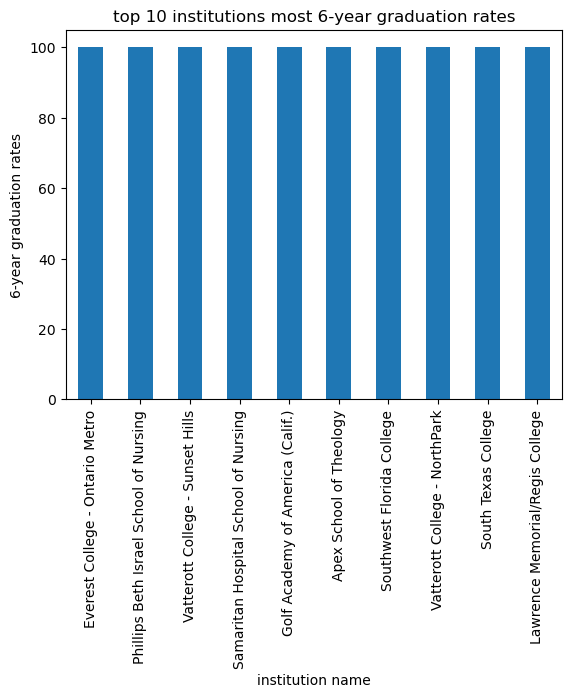

In [12]:
import matplotlib.pyplot as plt
group=df.groupby('chronname')['grad_150_value'].mean()
top10graph=group.sort_values(ascending=False).head(10)
top10graphdf=top10graph.reset_index()
top10graphdf.columns=['institutionname', '6 year graduation rate']
top10graph.plot(kind='bar')
plt.xlabel('institution name')
plt.ylabel('6-year graduation rates')
plt.title('top 10 institutions most 6-year graduation rates')
plt.show()

In [14]:
#result data gives us that students enroling are academacaly strong as well as the education given there is also top notch

In [16]:
group=df.groupby('chronname')['aid_value'].mean()
lowaid=group.sort_values(ascending=True).head(10)


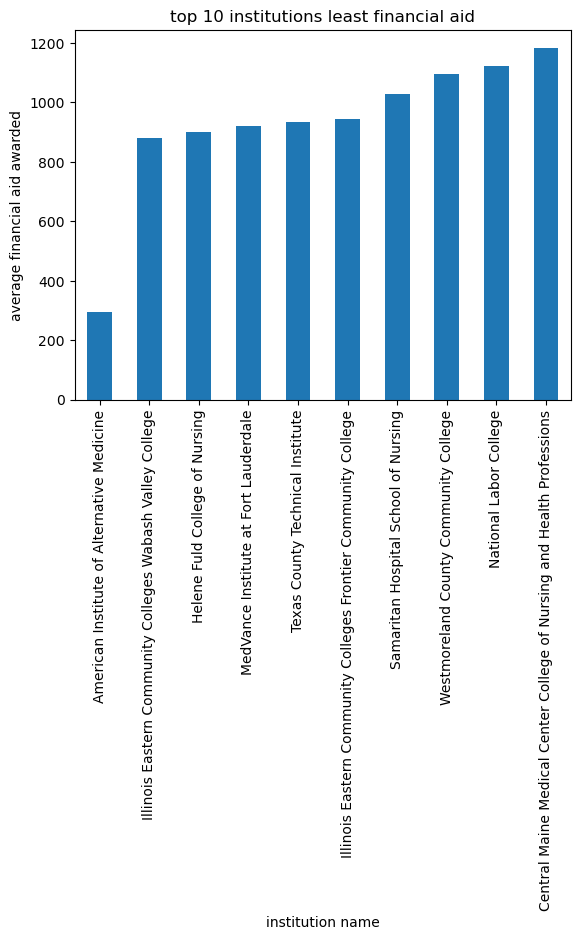

In [17]:
lowaid.plot(kind='bar')
plt.xlabel('institution name')
plt.ylabel('average financial aid awarded')
plt.title('top 10 institutions least financial aid')
plt.show()


In [18]:
#2 the institution given the least financialy aided 

In [19]:
#3

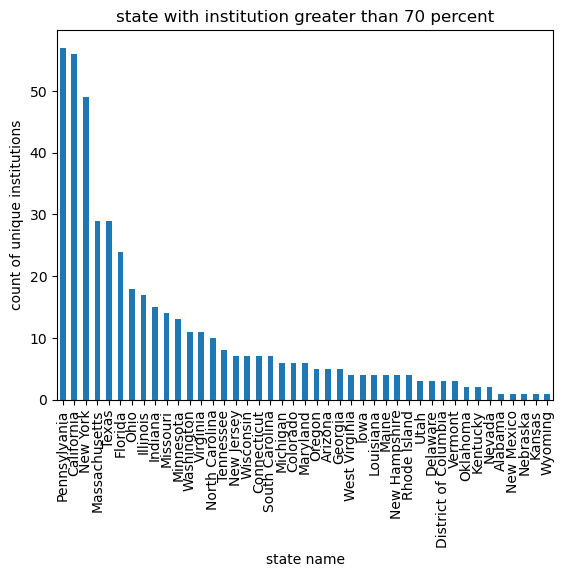

In [24]:
df=df.reset_index()
grad=df[df['grad_150_value']>70]
state=grad.groupby('state')['chronname'].nunique().sort_values(ascending=False)

state.plot(kind='bar')
plt.xlabel("state name")
plt.ylabel("count of unique institutions")
plt.title("state with institution greater than 70 percent")
plt.show()


In [22]:
#3 states having graduation rate higher than 70 perecent

In [25]:
#4

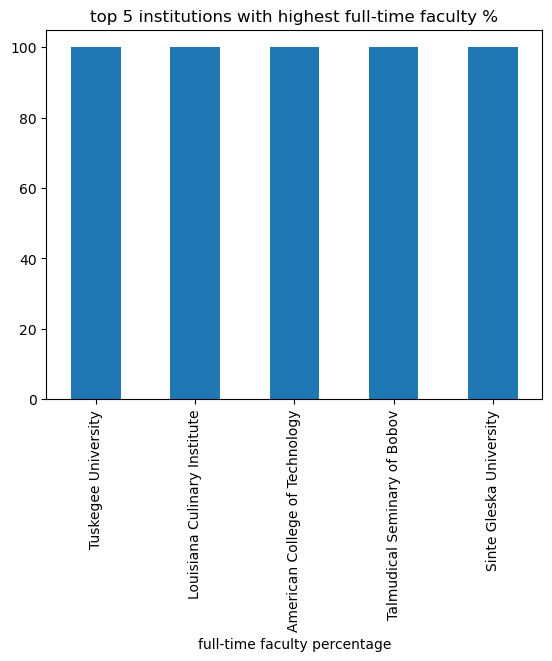

In [26]:
df=df.reset_index()
faculty=df.sort_values(by='ft_fac_value',ascending=False).head(5)[['chronname','ft_fac_value']]

faculty.plot(kind='bar',x='chronname',y='ft_fac_value',legend=False)
plt.xlabel("full-time faculty percentage")
plt.title("top 5 institutions with highest full-time faculty %")
plt.show()


In [27]:
#4 top 5 institutuions where facult full time are present in these institiutions

In [28]:
#5


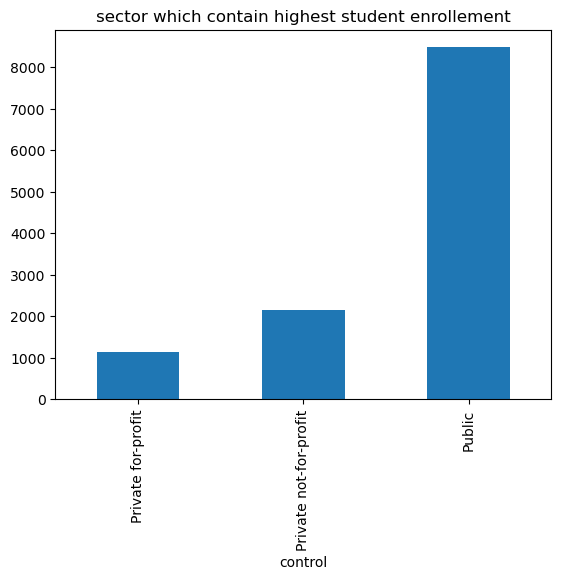

In [29]:
count=df.groupby('control')['student_count'].mean()
count.plot(kind='bar')
plt.title("sector which contain highest student enrollement")
plt.show()


In [30]:
#5 this shows on average count that  which students go more private or public
#this is prmarly due to the high cost in the private sector

In [31]:
#6

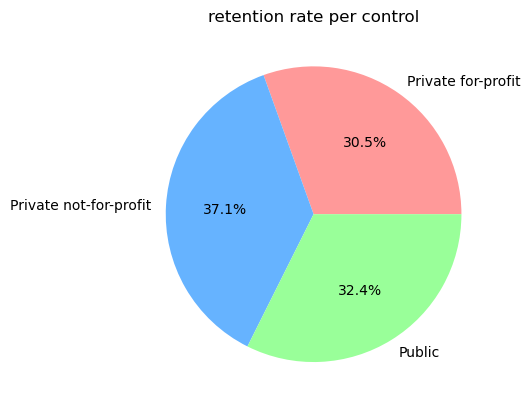

In [33]:
df=df.reset_index(drop=True)
ret=df.groupby('control')['retain_value'].mean()

ret.plot(kind='pie',autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('retention rate per control')
plt.ylabel('')
plt.show()


In [34]:
#this shows the average retention rate between privatre public and private not for profit

In [35]:
#7

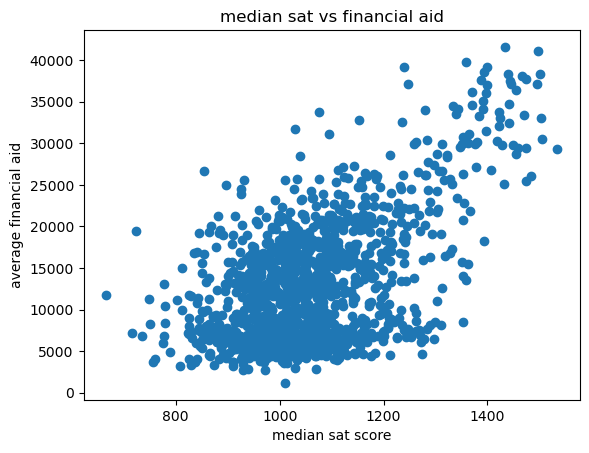

In [36]:
plt.scatter(df['med_sat_value'],df['aid_value'])
plt.xlabel("median sat score")
plt.ylabel("average financial aid")
plt.title("median sat vs financial aid")
plt.show()


In [37]:
#this shows relation between sat scores to financial aid awarded to institutions

In [38]:
#end